In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
dataset

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.0,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,NaN,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [ ]:
dataset.shape

(30000, 24)

In [ ]:
dataset.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
{column : len(dataset[column].unique()) for column in dataset.columns }

{'Age': 48,
 'Co-Applicant': 2,
 'Credit Score': 17587,
 'Current Loan Expenses (USD)': 24042,
 'Customer ID': 30000,
 'Dependents': 11,
 'Expense Type 1': 2,
 'Expense Type 2': 2,
 'Gender': 3,
 'Has Active Credit Card': 4,
 'Income (USD)': 24430,
 'Income Stability': 3,
 'Loan Amount Request (USD)': 29982,
 'Loan Sanction Amount (USD)': 21451,
 'Location': 3,
 'Name': 30000,
 'No. of Defaults': 2,
 'Profession': 8,
 'Property Age': 24180,
 'Property ID': 999,
 'Property Location': 4,
 'Property Price': 29632,
 'Property Type': 4,
 'Type of Employment': 19}

### Visualizing Data

In [ ]:
numerical_columns = dataset.dtypes[dataset.dtypes != 'object'].index
numerical_columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [ ]:
categorical_columns = dataset.dtypes[dataset.dtypes == 'object'].index
categorical_columns

Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

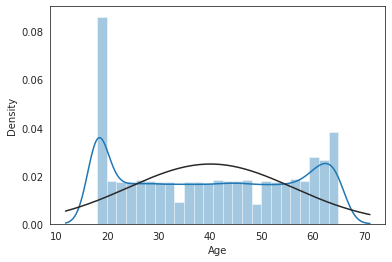

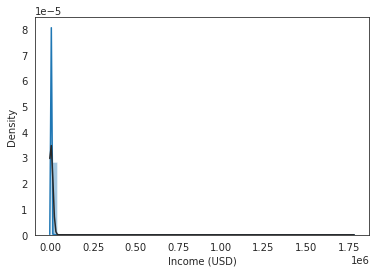

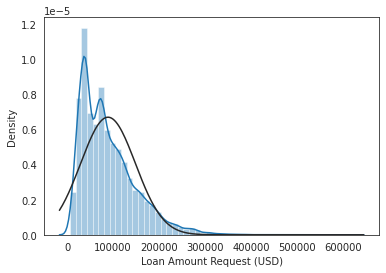

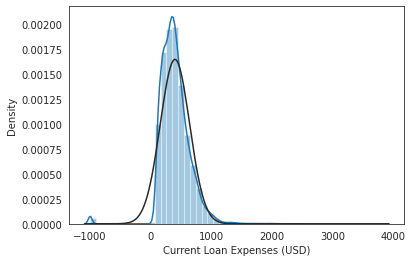

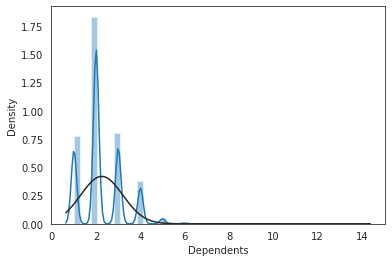

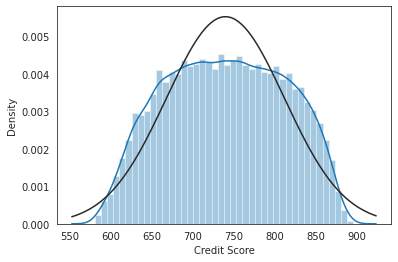

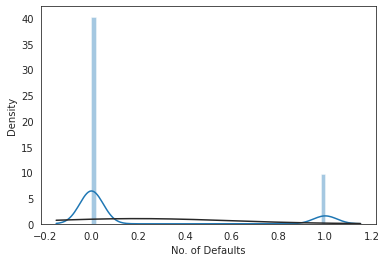

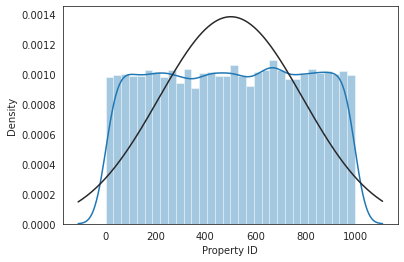

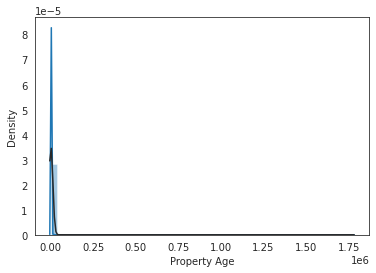

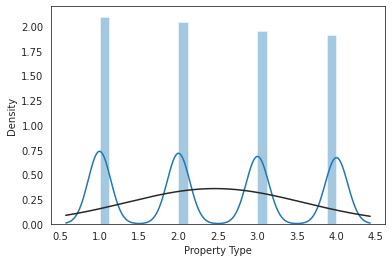

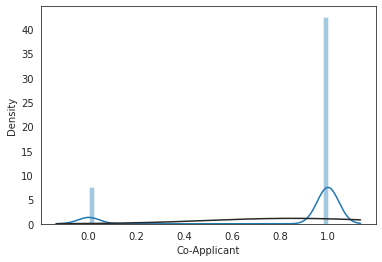

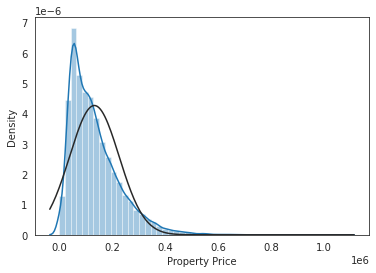

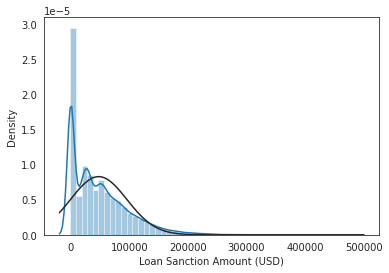

In [ ]:
#Distribution Plot / Histogram
for col in numerical_columns:
  sns.set_style('white');
  plt.figure();
  sns.distplot(dataset[col], fit = norm); 

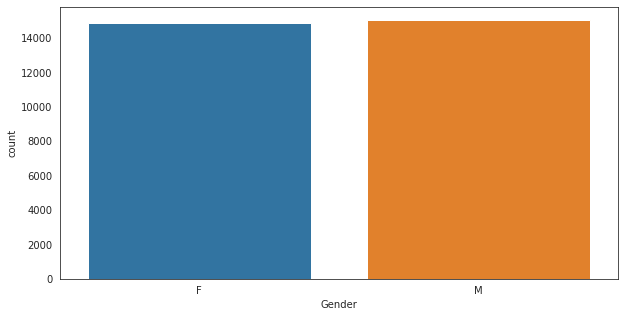

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Gender'])

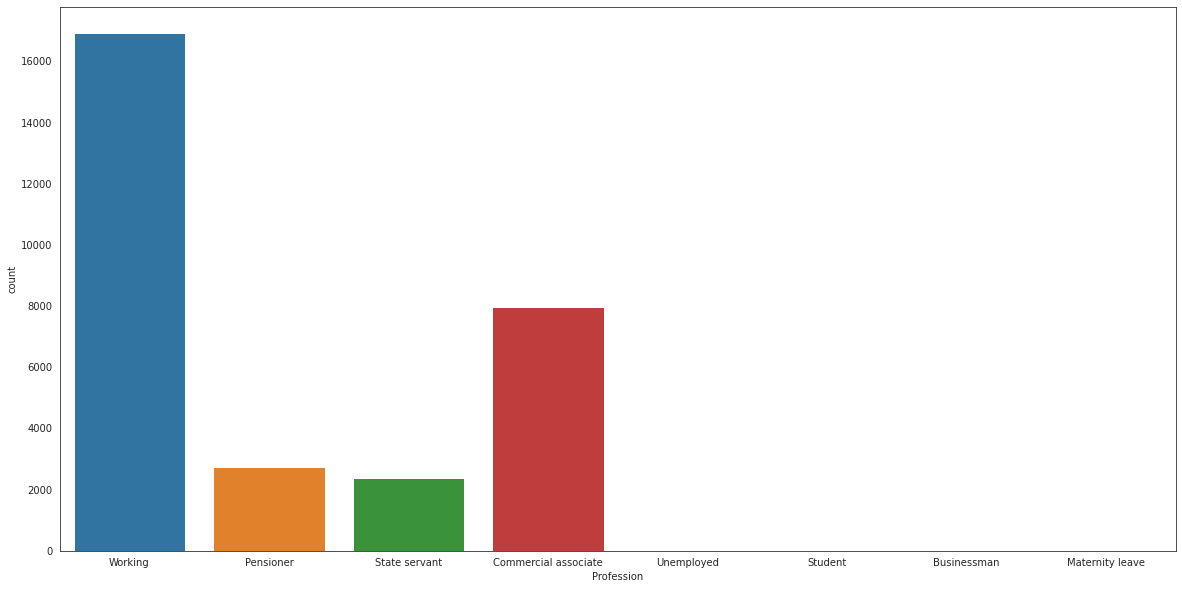

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Profession'])

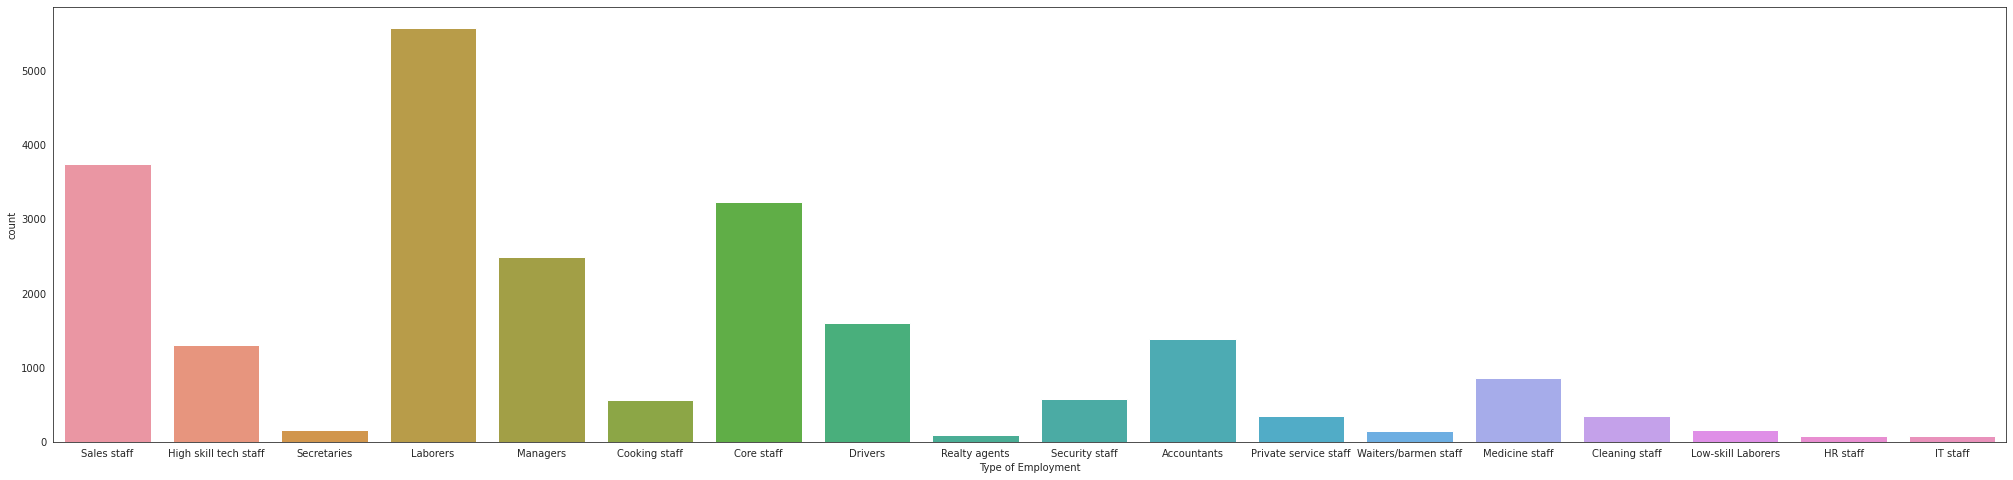

In [ ]:
fig_dims = (35, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Type of Employment'])

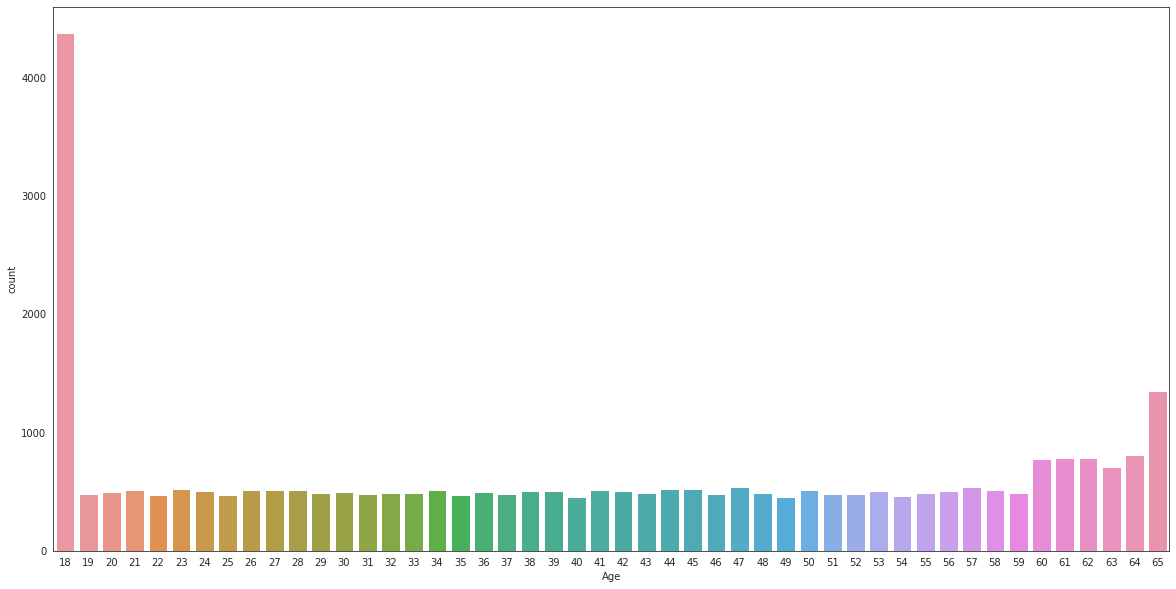

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Age'])

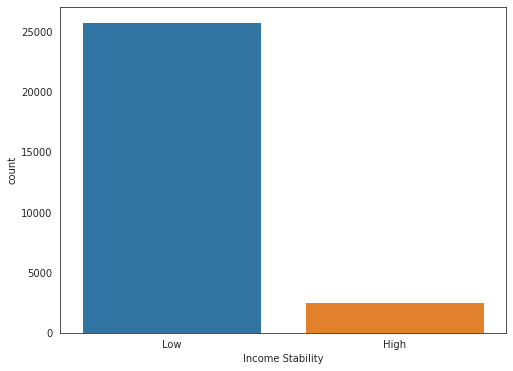

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Income Stability'])



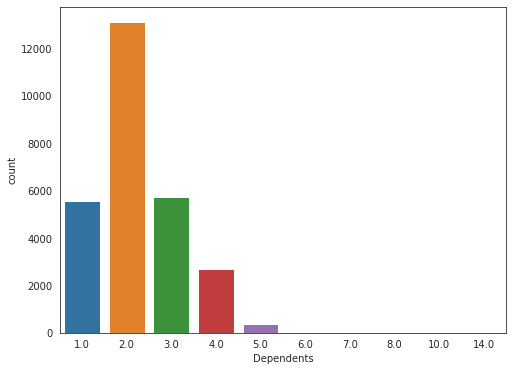

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Dependents'])

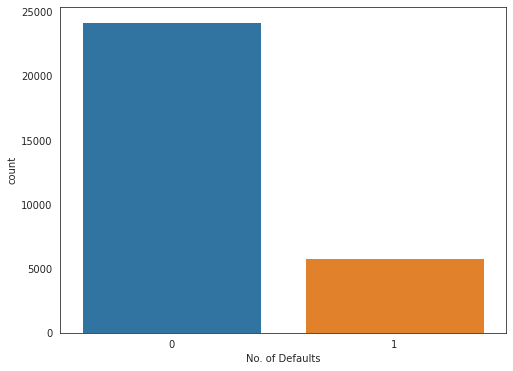

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['No. of Defaults'])

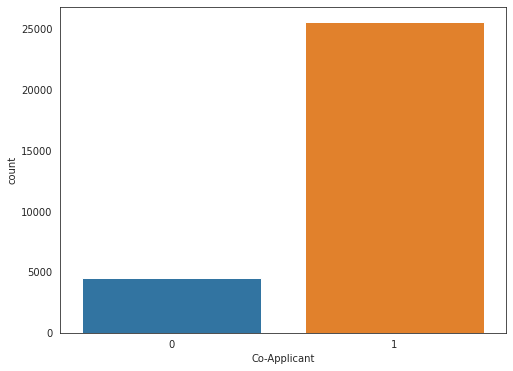

In [ ]:
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Co-Applicant'])

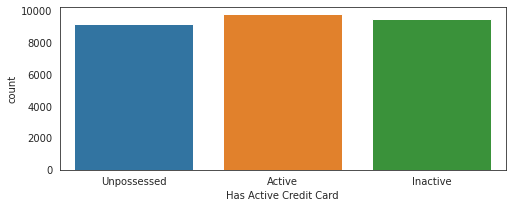

In [ ]:
fig_dims = (8, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Has Active Credit Card'])

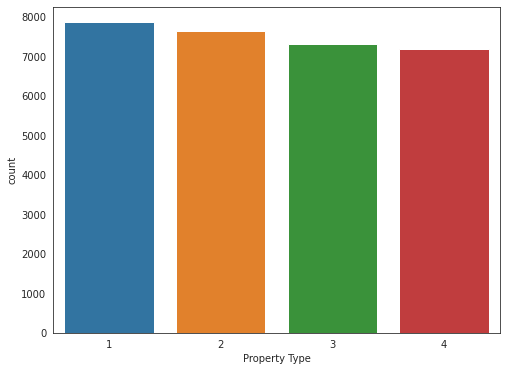

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Property Type'])

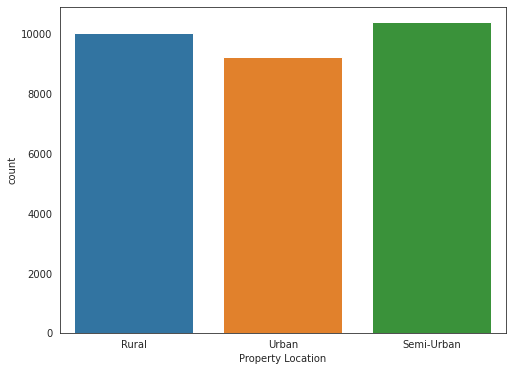

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Property Location'])

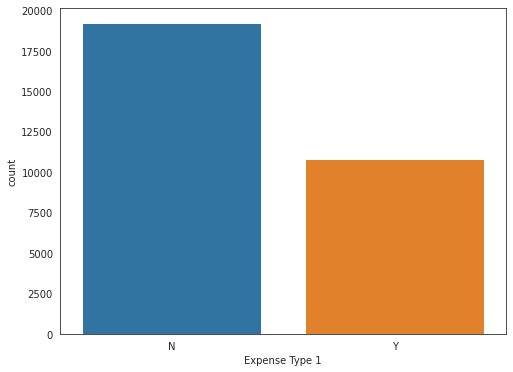

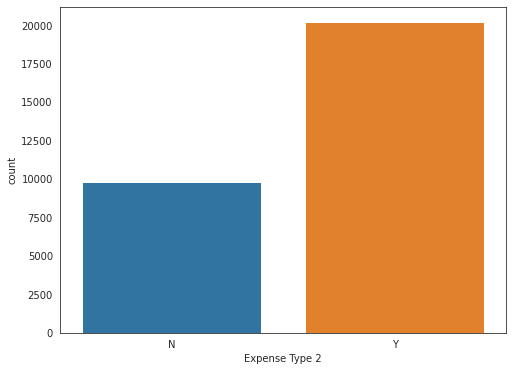

In [ ]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Expense Type 1'])

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dataset['Expense Type 2'])

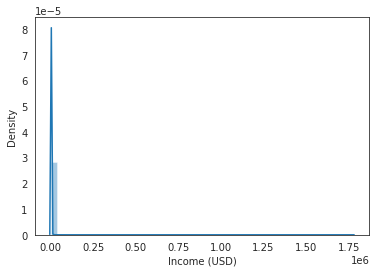

In [ ]:
sns.distplot(dataset['Income (USD)'])




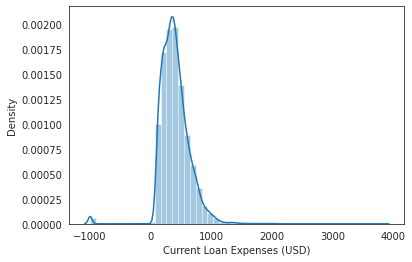

In [ ]:
sns.distplot(dataset['Current Loan Expenses (USD)'])

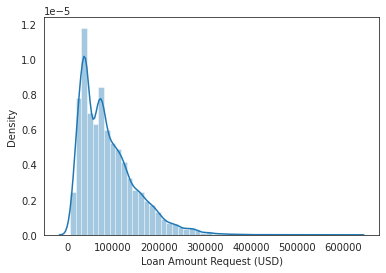

In [ ]:
sns.distplot(dataset['Loan Amount Request (USD)'])

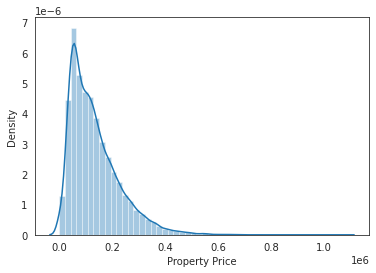

In [ ]:
sns.distplot(dataset['Property Price'])

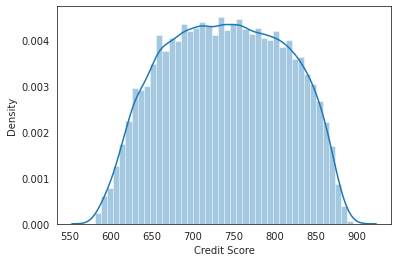

In [ ]:
sns.distplot(dataset[ 'Credit Score'])

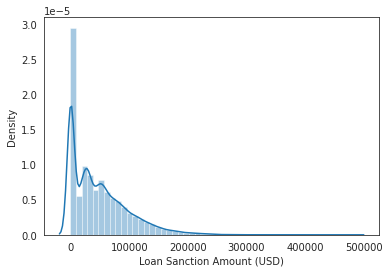

In [ ]:
sns.distplot(dataset[ 'Loan Sanction Amount (USD)'])

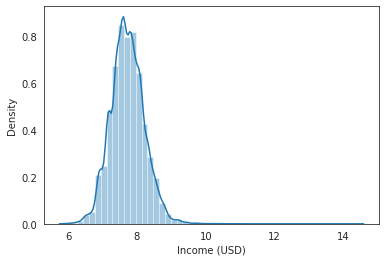

In [ ]:
dataset['Income (USD)'] = np.log(dataset['Income (USD)']+1)
sns.distplot(dataset['Income (USD)'])

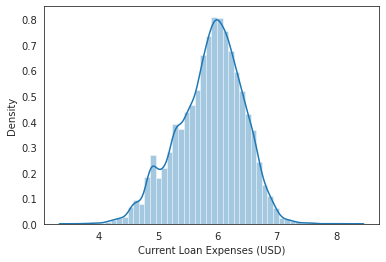

In [ ]:
dataset['Current Loan Expenses (USD)']= np.log(dataset['Current Loan Expenses (USD)']+1)
sns.distplot(dataset['Current Loan Expenses (USD)'])


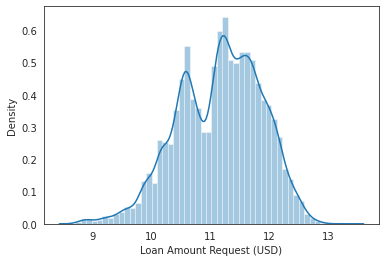

In [ ]:
dataset['Loan Amount Request (USD)'] = np.log(dataset['Loan Amount Request (USD)']+1)
sns.distplot(dataset['Loan Amount Request (USD)'])

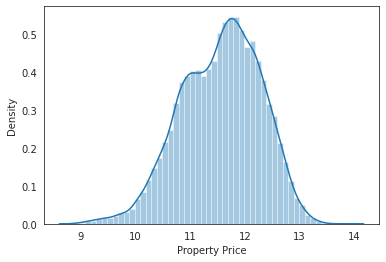

In [ ]:
dataset['Property Price'] = np.log(dataset['Property Price']+1)
sns.distplot(dataset['Property Price'])

### Visualizing Correlation between Dependent and independent variable

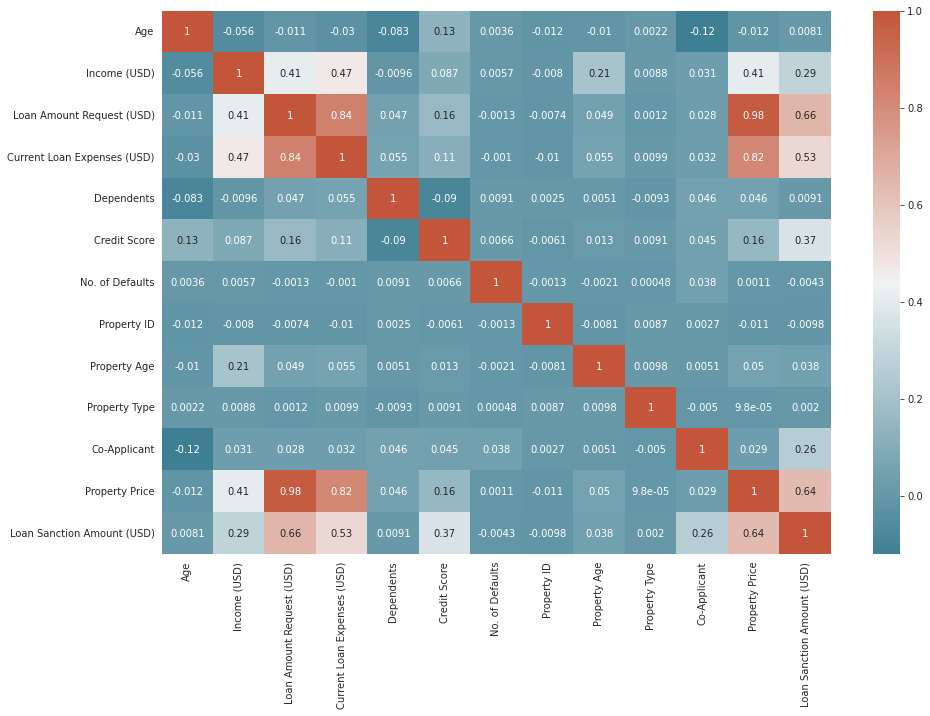

In [ ]:
corr = dataset.corr()

plt.subplots(figsize=(15,10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

As we can see that Property age and income are 100 % correlated so we will drop property age column

Forming List of Relevant Columns

In [ ]:
  COLUMNS = ['Age', 'Income (USD)','Income Stability',
              'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
              'Dependents', 'Credit Score',
              'No. of Defaults', 'Co-Applicant',
              'Property Price', 'Loan Sanction Amount (USD)']

### Reading only relevant Columns from the dataste

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv',usecols = COLUMNS)

In [ ]:
dataset.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,0.850533,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,0.356554,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,0.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.000000,1.077967e+06,481907.320000


In [ ]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 25424 non-null  float64
 2   Income Stability             28317 non-null  object 
 3   Loan Amount Request (USD)    30000 non-null  float64
 4   Current Loan Expenses (USD)  29828 non-null  float64
 5   Dependents                   27507 non-null  float64
 6   Credit Score                 28297 non-null  float64
 7   No. of Defaults              30000 non-null  int64  
 8   Co-Applicant                 30000 non-null  int64  
 9   Property Price               30000 non-null  float64
 10  Loan Sanction Amount (USD)   29660 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 2.5+ MB


(30000, 11)

In [ ]:
fig = px.histogram(dataset,x='Income (USD)')

fig.show()

In [ ]:
print(sorted(dataset['Income (USD)'], reverse = True))

[nan, nan, 9699.63, 8952.64, 8237.17, 5666.31, 5350.94, 4952.91, 4028.01, 3716.54, 2889.94, 2719.74, 2614.77, 2538.85, 2497.4, 2416.86, 2361.56, 2346.88, 2077.42, 1933.05, 1837.17, 1664.52, 1546.17, 1537.82, 1523.03, 1296.07, 1266.06, 1234.92, 997.25, 988.19, 777.25, 700.07, nan, 7885.56, 5330.72, nan, nan, nan, 5445.6, 5302.28, 4096.07, 4068.02, 3880.49, 3031.97, nan, 5021.9, 4141.15, 3865.02, 3384.91, 2680.38, nan, nan, 3967.09, 3516.53, 3175.91, 3104.0, 2966.6, 2814.48, 2760.03, 2700.12, 2590.89, 2478.54, 2478.3, 2476.71, 2474.33, 2368.34, 2239.14, 2178.86, 2067.66, 1993.49, 1984.32, 1974.82, 1972.0, 1960.17, 1871.92, 1822.63, 1794.1, 1761.15, 1694.53, 1671.02, 1633.88, 1589.8, 1580.38, 1519.67, 1332.42, 1318.47, 1282.74, 1224.99, 1220.16, 1179.18, 1047.12, nan, nan, nan, 6446.85, 6060.9, 3537.39, 3477.95, nan, nan, 3214.48, nan, nan, 4493.53, nan, 4752.31, 3418.19, 3370.31, 2918.66, 2573.03, nan, 2877.12, nan, nan, nan, 6161.03, 3496.45, 3131.48, 2867.54, 2462.09, 2461.58, 2356.9, 

In [ ]:
(dataset.sort_values(by=['Income (USD)'], ascending=False)).head()

,Age,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
20965,29,1777460.21,Low,87735.85,390.93,3.0,730.61,0,1,164053.95,61415.10
6719,48,122966.28,Low,224244.73,1993.87,NaN,795.26,0,1,423225.33,156971.31
26619,18,54653.75,Low,136800.45,1008.75,2.0,819.38,0,0,253283.34,0.00
15991,25,48095.16,Low,131548.67,615.10,3.0,826.98,1,0,154969.85,0.00
29585,59,32726.98,Low,188548.43,1022.92,2.0,842.69,0,1,314408.50,131983.90


### Data Preprocesing

In [ ]:
negative_rows2=dataset.loc[dataset['Current Loan Expenses (USD)']<0, :].index

dataset= dataset.drop(negative_rows2, axis=0).reset_index(drop=True)

In [ ]:
negative_rows=dataset.loc[dataset['Loan Sanction Amount (USD)']<0, :].index

dataset= dataset.drop(negative_rows, axis=0).reset_index(drop=True)

In [ ]:
negative_rows1=dataset.loc[dataset['Property Price']<0, :].index

In [ ]:
dataset= dataset.drop(negative_rows1, axis=0).reset_index(drop=True)

In [ ]:
mode = dataset['Income Stability'].mode()[0]
dataset['Income Stability'].fillna(mode, inplace=True)

In [ ]:
mean = dataset['Income (USD)'].mean()
dataset['Income (USD)'].fillna(mean, inplace=True)

In [ ]:
dataset['Current Loan Expenses (USD)'] = dataset['Current Loan Expenses (USD)'].fillna(0)

In [ ]:
dataset['Dependents'] = dataset['Dependents'].fillna(0)

In [ ]:
mean = dataset['Credit Score'].mean()
dataset['Credit Score'].fillna(mean, inplace=True)

In [ ]:
dataset= dataset.dropna(subset=['Loan Sanction Amount (USD)'])

In [ ]:
dataset.head()

,Age,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.050000,Low,72809.58,241.08,3.0,809.44,0,1,119933.46,54607.18
1,32,4952.910000,Low,46837.47,495.81,1.0,780.40,0,1,54791.00,37469.98
2,65,988.190000,High,45593.04,171.95,1.0,833.15,0,0,72440.58,36474.43
3,65,2631.791559,High,80057.92,298.54,2.0,832.70,1,1,121441.51,56040.54
4,31,2614.770000,Low,113858.89,491.41,0.0,745.55,1,1,208567.91,74008.28


In [ ]:
dataset.shape

(28825, 11)

### Final data


In [ ]:
data_new = dataset.copy()

In [ ]:
data_new = data_new.drop(20965, axis=0).reset_index(drop=True)

In [ ]:
(data_new.sort_values(by=['Income (USD)'], ascending=False)).head()

,Age,Income (USD),Income Stability,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
20128,29,1777460.21,Low,87735.85,390.93,3.0,730.61,0,1,164053.95,61415.10
6450,48,122966.28,Low,224244.73,1993.87,0.0,795.26,0,1,423225.33,156971.31
25568,18,54653.75,Low,136800.45,1008.75,2.0,819.38,0,0,253283.34,0.00
15366,25,48095.16,Low,131548.67,615.10,3.0,826.98,1,0,154969.85,0.00
28435,59,32726.98,Low,188548.43,1022.92,2.0,842.69,0,1,314408.50,131983.90


In [ ]:
fig = px.histogram(data_new,x='Income (USD)')

fig.show()

Looking for Null Values in Columns after Preprocessing 

In [ ]:
data_new.isnull().sum()

Age                            0
Income (USD)                   0
Income Stability               0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [ ]:
{column : len(data_new[column].unique()) for column in data_new.columns }

{'Age': 48,
 'Co-Applicant': 2,
 'Credit Score': 17172,
 'Current Loan Expenses (USD)': 23380,
 'Dependents': 11,
 'Income (USD)': 23591,
 'Income Stability': 2,
 'Loan Amount Request (USD)': 28806,
 'Loan Sanction Amount (USD)': 21016,
 'No. of Defaults': 2,
 'Property Price': 28809}

### Encoding

In [ ]:
data_new['Income Stability1'] = [1 if x == 'High' else 0 for x in data_new['Income Stability']]

data_new = data_new.drop(['Income Stability'], axis = 1)
data_new.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability1
0,56,1933.050000,72809.58,241.08,3.0,809.44,0,1,119933.46,54607.18,0
1,32,4952.910000,46837.47,495.81,1.0,780.40,0,1,54791.00,37469.98,0
2,65,988.190000,45593.04,171.95,1.0,833.15,0,0,72440.58,36474.43,1
3,65,2631.791559,80057.92,298.54,2.0,832.70,1,1,121441.51,56040.54,1
4,31,2614.770000,113858.89,491.41,0.0,745.55,1,1,208567.91,74008.28,0


In [ ]:
data_new.shape

(28824, 11)

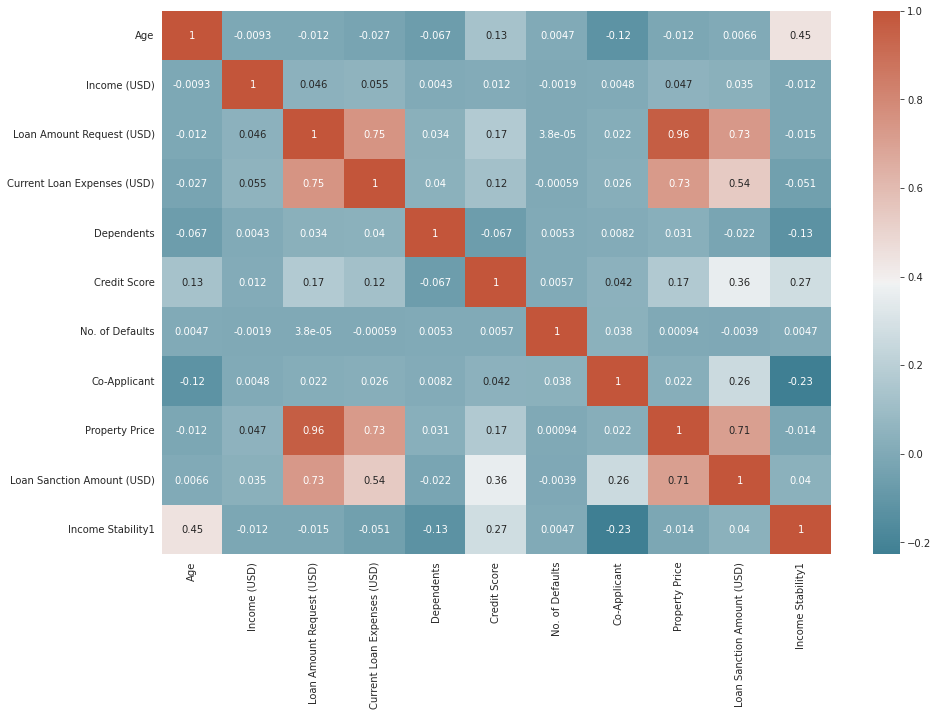

In [ ]:
corr = data_new.corr()

plt.subplots(figsize=(15 ,10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
# sns.pairplot(data_new)

In [ ]:
data_classification=data_new.copy()

### Splitting data into Train and test

In [ ]:
target = data_new.iloc[:, (data_new.columns.get_loc('Loan Sanction Amount (USD)'))].values
data_new = data_new.drop('Loan Sanction Amount (USD)', axis = 1)

In [ ]:
target

array([ 54607.18,  37469.98,  36474.43, ...,  61057.56,  99766.87,
       117217.9 ])

In [ ]:
data_new

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Income Stability1
0,56,1933.050000,72809.58,241.08,3.0,809.440000,0,1,119933.46,0
1,32,4952.910000,46837.47,495.81,1.0,780.400000,0,1,54791.00,0
2,65,988.190000,45593.04,171.95,1.0,833.150000,0,0,72440.58,1
3,65,2631.791559,80057.92,298.54,2.0,832.700000,1,1,121441.51,1
4,31,2614.770000,113858.89,491.41,0.0,745.550000,1,1,208567.91,0
...,...,...,...,...,...,...,...,...,...,...
28819,38,4969.410000,76657.90,722.34,2.0,869.610000,0,1,111096.56,0
28820,20,1606.880000,66595.14,253.04,3.0,729.410000,0,1,73453.94,0
28821,49,2631.791559,81410.08,583.11,0.0,740.050679,0,1,102108.02,0
28822,38,2417.710000,142524.10,378.29,3.0,677.270000,1,1,168194.47,0


In [ ]:
target = target.reshape(len(target),1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new, target, test_size = 0.20,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_y = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)


In [ ]:
gbr = GradientBoostingRegressor(warm_start=True, criterion='mse',max_depth=5, n_estimators=150, n_iter_no_change=10 ,verbose=0)
gbr.fit(x_train, y_train)
predictions = gbr.predict(x_test)
print('r2 : ',max(0,100*r2_score(y_test, predictions)))
print('mse : ',mean_squared_error(y_test, predictions))
print('mae : ',mean_absolute_error(y_test, predictions))
print('rmse : ',sqrt(mean_squared_error(y_test, predictions)))
print("score : ",gbr.score(x_train, y_train))

r2 :  75.87353740407715
mse :  0.22979325244590068
mae :  0.2564181121932407
rmse :  0.47936755464455527
score :  0.8006939357521979


In [ ]:
train_predictions = gbr.predict(x_train)

print('Train Errors')
print('mse : ',mean_squared_error(y_train, train_predictions))
print('mae : ',mean_absolute_error(y_train, train_predictions))
print('rmse : ',sqrt(mean_squared_error(y_train, train_predictions)))


Train Errors
mse :  0.19930606424780212
mae :  0.2500568046503457
rmse :  0.4464370775907867


In [ ]:
predictions = predictions.reshape(len(predictions),1)

In [ ]:
predictions

array([[-0.07705004],
       [ 0.1857613 ],
       [-1.13642744],
       ...,
       [ 0.62521337],
       [ 2.19515676],
       [ 0.96766259]])

In [ ]:
predictions=sc_y.inverse_transform(predictions)
y_test=sc_y.inverse_transform(y_test)

In [ ]:
predictions

array([[ 44697.20892135],
       [ 57438.34616201],
       [ -6661.58266885],
       ...,
       [ 78743.05480522],
       [154854.17017512],
       [ 95345.04980365]])

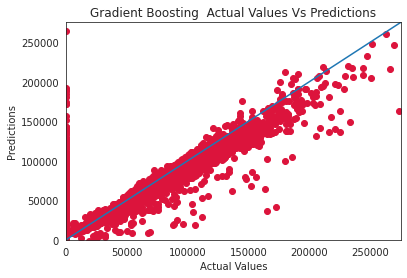

In [ ]:
plt.scatter(y_test, predictions,c='Crimson')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
lims = [0, 275000]
plt.xlim(0,275000)
plt.title('Gradient Boosting  Actual Values Vs Predictions')
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# cross_validate(gbr, data_new, target, cv=6, scoring='r2', verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# score = cross_val_score(gbr, x_train, y_train, cv=6)
# print("Gradient Boosting Regressor Cross validation is",np.mean(score)*100)

In [ ]:
importances = pd.DataFrame({'Features':data_new.columns,'Importance':np.round(gbr.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11)

,Importance
Features,
Loan Amount Request (USD),0.680
Credit Score,0.169
Co-Applicant,0.106
Income Stability1,0.019
Property Price,0.010
Income (USD),0.006
Age,0.005
Current Loan Expenses (USD),0.002
Dependents,0.002


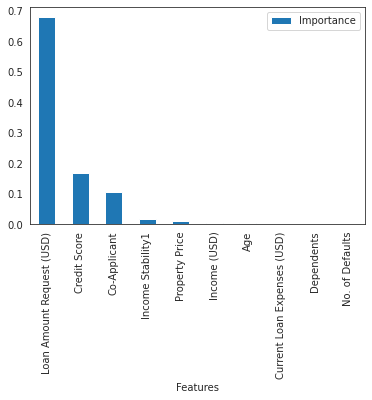

In [ ]:
importances.plot.bar()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
DT=DecisionTreeRegressor(min_samples_split=20)

In [ ]:
y_test = sc_y.transform(y_test)

In [ ]:
DT.fit(x_train,y_train)
predictions = DT.predict(x_test)
print('r2 : ',max(0,100*r2_score(y_test, predictions)))
print('mse : ',mean_squared_error(y_test, predictions))
print('mae : ',mean_absolute_error(y_test, predictions))
print('rmse : ',sqrt(mean_squared_error(y_test, predictions)))
print("score : ",DT.score(x_train, y_train))

r2 :  67.48233611439223
mse :  0.3097155132671282
mae :  0.2504686701414962
rmse :  0.5565209010155218
score :  0.8964875844787055


In [ ]:
train_predictions = DT.predict(x_train)

print('Train Errors')
print('mse : ',mean_squared_error(y_train, train_predictions))
print('mae : ',mean_absolute_error(y_train, train_predictions))
print('rmse : ',sqrt(mean_squared_error(y_train, train_predictions)))

Train Errors
mse :  0.10351241552129456
mae :  0.13582560618157874
rmse :  0.321733454153115


In [ ]:
predictions = predictions.reshape(len(predictions),1)

In [ ]:
predictions=sc_y.inverse_transform(predictions)
y_test=sc_y.inverse_transform(y_test)

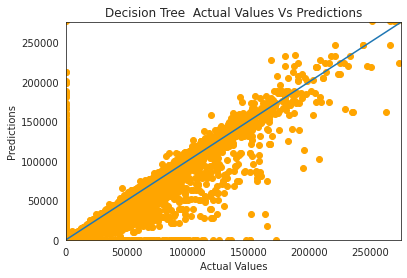

In [ ]:
plt.scatter(y_test, predictions,c='Orange')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
lims = [0,275000]
plt.xlim(0,275000)
plt.title('Decision Tree  Actual Values Vs Predictions')
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# cross_validate(DT, data_new, target, cv=6, scoring='r2', verbose=0)

In [ ]:
# score = cross_val_score(DT, x_train, y_train, cv=6)
# print("Decision Tree Cross validation is",np.mean(score)*100)

In [ ]:
importances = pd.DataFrame({'Features':data_new.columns,'Importance':np.round(DT.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Loan Amount Request (USD),0.639
Credit Score,0.184
Co-Applicant,0.077
Income Stability1,0.026
Income (USD),0.020
Property Price,0.018
Age,0.017
Current Loan Expenses (USD),0.011
Dependents,0.004


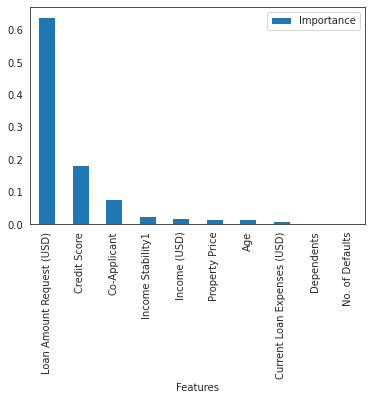

In [ ]:
importances.plot.bar()

In [ ]:
y_test = sc_y.transform(y_test)

In [ ]:
RF_reg = RandomForestRegressor(n_estimators=25, random_state=None)
RF_reg.fit(x_train,y_train)
predictions = RF_reg.predict(x_test)
print('r2 : ',max(0,100*r2_score(y_test, predictions)))
print('mse : ',mean_squared_error(y_test, predictions))
print('mae : ',mean_absolute_error(y_test, predictions))
print('rmse : ',sqrt(mean_squared_error(y_test, predictions)))
print("score : ",RF_reg.score(x_train, y_train))

r2 :  74.68392038837845
mse :  0.24112379715860077
mae :  0.2348734351901343
rmse :  0.4910435796939013
score :  0.9653210361909823


In [ ]:
train_predictions = RF_reg.predict(x_train)

print('Train Errors')
print('mse : ',mean_squared_error(y_train, train_predictions))
print('mae : ',mean_absolute_error(y_train, train_predictions))
print('rmse : ',sqrt(mean_squared_error(y_train, train_predictions)))

Train Errors
mse :  0.03467896380901775
mae :  0.08994005656678232
rmse :  0.18622288744678445


In [ ]:
predictions = predictions.reshape(len(predictions),1)

In [ ]:
predictions=sc_y.inverse_transform(predictions)
y_test=sc_y.inverse_transform(y_test)

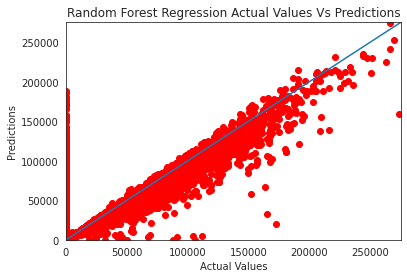

In [ ]:
plt.scatter(y_test, predictions, c='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
lims = [0, 275000]
plt.xlim(0,275000)
plt.title('Random Forest Regression Actual Values Vs Predictions')
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# cross_validate(RF_reg, data_new, target, cv=6, scoring='r2', verbose=0)

In [ ]:
# score = cross_val_score(DT, x_train, y_train, cv=6)
# print("Random Forest Cross validation is",np.mean(score)*100)

In [ ]:
importances = pd.DataFrame({'Features':data_new.columns,'Importance':np.round(RF_reg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Loan Amount Request (USD),0.598
Credit Score,0.173
Co-Applicant,0.072
Income (USD),0.035
Property Price,0.030
Current Loan Expenses (USD),0.028
Age,0.026
Income Stability1,0.025
Dependents,0.009


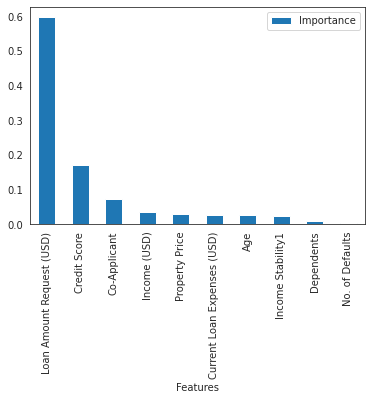

In [ ]:
importances.plot.title='Random Forest Feature Importance'
importances.plot.bar()


In [ ]:
y_test = sc_y.transform(y_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:

model1=tf.keras.models.Sequential()

model1.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=[x_train.shape[1]])),
model1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model1.add(tf.keras.layers.Dense(units=2, activation='relu'))
model1.add(tf.keras.layers.Dense(units=1))
opt = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model1.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae','mse'])


In [ ]:
model1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 16)                176       
                                                                 
 dense_107 (Dense)           (None, 8)                 136       
                                                                 
 dense_108 (Dense)           (None, 2)                 18        
                                                                 
 dense_109 (Dense)           (None, 1)                 3         
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(x_train, y_train,validation_split=0.2, epochs=100, batch_size=100)
# history=model1.fit(x_train, y_train, epochs=30, validation_split=0.2,verbose=1, batch_size=100)
# hist=pd.DataFrame(history.history)hist['epoch']=history.epochhist



Epoch 1/100
185/185 [==============================] - 1s 3ms/step - loss: 0.6500 - mae: 0.6400 - mse: 0.6500 - val_loss: 0.4430 - val_mae: 0.5116 - val_mse: 0.4430
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3969 - mae: 0.4630 - mse: 0.3969 - val_loss: 0.3457 - val_mae: 0.4205 - val_mse: 0.3457
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3377 - mae: 0.4026 - mse: 0.3377 - val_loss: 0.3171 - val_mae: 0.3683 - val_mse: 0.3171
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3145 - mae: 0.3690 - mse: 0.3145 - val_loss: 0.3036 - val_mae: 0.3517 - val_mse: 0.3036
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3040 - mae: 0.3521 - mse: 0.3040 - val_loss: 0.2969 - val_mae: 0.3438 - val_mse: 0.2969
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2975 - mae: 0.3436 - mse: 0.2975 - val_loss: 0.2931 - val_mae: 0.3357 - val_mse: 0.2931
Epoch 7/10

In [ ]:
model1.evaluate(x_test,y_test)

181/181 [==============================] - 0s 1ms/step - loss: 0.2541 - mae: 0.2622 - mse: 0.2541


[0.25411099195480347, 0.26215580105781555, 0.25411099195480347]

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


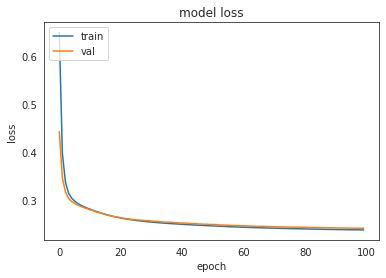

In [ ]:
# list all data in history
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model1.predict(x_test)
print('r2 : ',max(0,100*r2_score(y_test, predictions)))
print('mse : ',mean_squared_error(y_test, predictions))
print('mae : ',mean_absolute_error(y_test, predictions))
print('rmse : ',sqrt(mean_squared_error(y_test, predictions)))


r2 :  73.32037101561086
mse :  0.2541109660812336
mae :  0.26215587518788164
rmse :  0.5040942035782932


In [ ]:
predictions=sc_y.inverse_transform(predictions)
y_test=sc_y.inverse_transform(y_test)

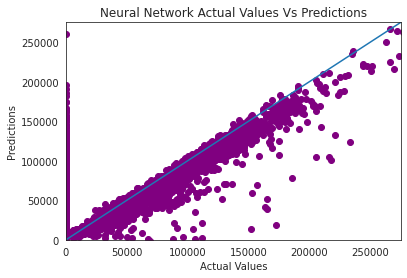

In [ ]:
plt.scatter(y_test, predictions, c='purple')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
lims = [0, 275000]
plt.xlim(0,275000)
plt.title('Neural Network Actual Values Vs Predictions')
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Predicting Values on Test data

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
CUST_ID = test_data['Customer ID']
REQ_AMT = test_data['Loan Amount Request (USD)']
COLUMNS.remove('Loan Sanction Amount (USD)')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv',usecols=COLUMNS)


### Test data Pre-Processing

In [ ]:
mode = test_data['Income Stability'].mode()[0]
test_data['Income Stability'].fillna(mode, inplace=True)

mean = test_data['Income (USD)'].mean()
test_data['Income (USD)'].fillna(mean, inplace=True)

test_data['Income Stability1'] = [1 if x == 'High' else 0 for x in test_data['Income Stability']]
test_data = test_data.drop(['Income Stability'], axis = 1)

test_data['Current Loan Expenses (USD)'] = test_data['Current Loan Expenses (USD)'].fillna(0)

test_data['Dependents'] = test_data['Dependents'].fillna(0)

mean = test_data['Credit Score'].mean()
test_data['Credit Score'].fillna(mean, inplace=True)



In [ ]:
print(test_data.shape)
test_data.head()

(20000, 10)


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Income Stability1
0,47,3472.69,137088.98,396.72,2.0,799.140000,0,1,236644.50,0
1,57,1184.84,104771.59,463.76,2.0,833.310000,0,1,142357.30,0
2,52,1266.27,176684.91,493.15,3.0,627.440000,0,1,300991.24,0
3,65,1369.72,97009.18,446.15,2.0,833.200000,0,0,125612.10,1
4,60,1939.23,109980.00,370.10,0.0,738.821538,0,1,180908.00,1


In [ ]:
test_data.isnull().sum()

Age                            0
Income (USD)                   0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Co-Applicant                   0
Property Price                 0
Income Stability1              0
dtype: int64

In [ ]:
test_data = sc.transform(test_data)

### Predicting Test data

In [ ]:
test_pred = gbr.predict(test_data)

In [ ]:
test_pred

array([ 0.78573991,  0.38317376, -0.54914999, ..., -1.12460518,
        0.50060263, -0.04508151])

In [ ]:
test_pred = test_pred.reshape(len(test_pred),1)

In [ ]:
test_pred = sc_y.inverse_transform(test_pred)

In [ ]:
test_pred1 = test_pred.flatten()

In [ ]:
test_pred1

array([86525.4082317 , 67008.9349321 , 21809.72499669, ...,
       -6088.43750025, 72701.90575595, 46247.04862201])

In [ ]:
y_test = sc_y.inverse_transform(y_test)

In [ ]:
Predicted_Amount = pd.DataFrame({'Customer ID' : CUST_ID,'Loan Amount Request (USD)' : REQ_AMT, 'Loan Sanction Amount (USD)':test_pred1})

In [ ]:
Predicted_Amount

,Customer ID,Loan Amount Request (USD),Loan Sanction Amount (USD)
0,C-26247,137088.98,86525.408232
1,C-35067,104771.59,67008.934932
2,C-34590,176684.91,21809.724997
3,C-16668,97009.18,39967.468143
4,C-12196,109980.00,70490.803478
...,...,...,...
19995,C-9076,156766.97,94642.668912
19996,C-17587,47924.80,31884.335010
19997,C-46479,18629.88,-6088.437500
19998,C-3099,95430.73,72701.905756


# END

Classification

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# Create Classification version
dataset['Loan Sanctioned'] = [0 if x ==0 else 1 for x in dataset['Loan Sanction Amount (USD)']]


In [ ]:
data_classification['Loan Sanctioned'] = [0 if x ==0 else 1 for x in data_classification['Loan Sanction Amount (USD)']]

In [ ]:
data_classification

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability1,Loan Sanctioned
0,56,1933.050000,72809.58,241.08,3.0,809.440000,0,1,119933.46,54607.18,0,1
1,32,4952.910000,46837.47,495.81,1.0,780.400000,0,1,54791.00,37469.98,0,1
2,65,988.190000,45593.04,171.95,1.0,833.150000,0,0,72440.58,36474.43,1,1
3,65,2631.791559,80057.92,298.54,2.0,832.700000,1,1,121441.51,56040.54,1,1
4,31,2614.770000,113858.89,491.41,0.0,745.550000,1,1,208567.91,74008.28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28819,38,4969.410000,76657.90,722.34,2.0,869.610000,0,1,111096.56,68992.11,0,1
28820,20,1606.880000,66595.14,253.04,3.0,729.410000,0,1,73453.94,46616.60,0,1
28821,49,2631.791559,81410.08,583.11,0.0,740.050679,0,1,102108.02,61057.56,0,1
28822,38,2417.710000,142524.10,378.29,3.0,677.270000,1,1,168194.47,99766.87,0,1


In [ ]:
data_classification['Loan Sanctioned'].value_counts()

1    21024
0     7800
Name: Loan Sanctioned, dtype: int64

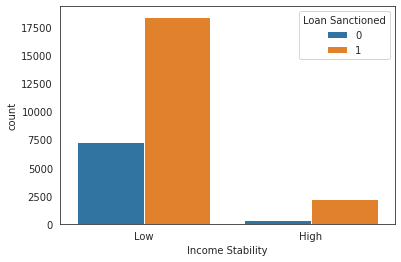

In [ ]:
sns.countplot(x='Income Stability', hue='Loan Sanctioned', data=dataset)

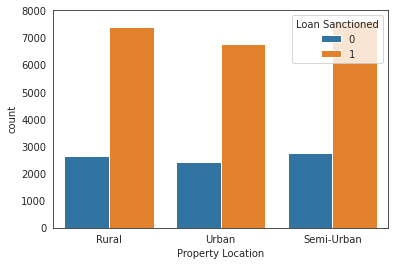

In [ ]:
sns.countplot(x='Property Location', hue='Loan Sanctioned', data=dataset)

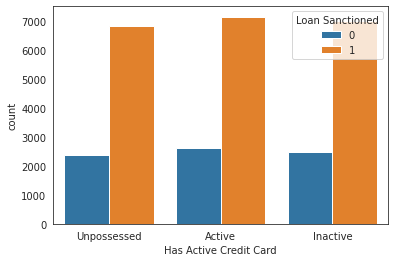

In [ ]:
sns.countplot(x='Has Active Credit Card', hue='Loan Sanctioned', data=dataset)

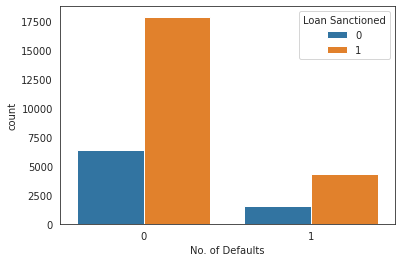

In [ ]:
sns.countplot(x='No. of Defaults', hue='Loan Sanctioned', data=dataset)

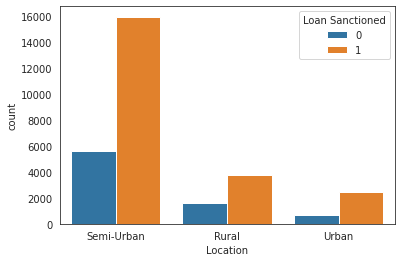

In [ ]:
sns.countplot(x='Location', hue='Loan Sanctioned', data=dataset)

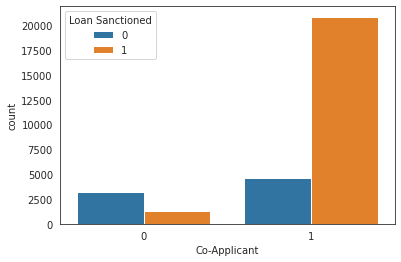

In [ ]:
sns.countplot(x='Co-Applicant', hue='Loan Sanctioned', data=dataset)

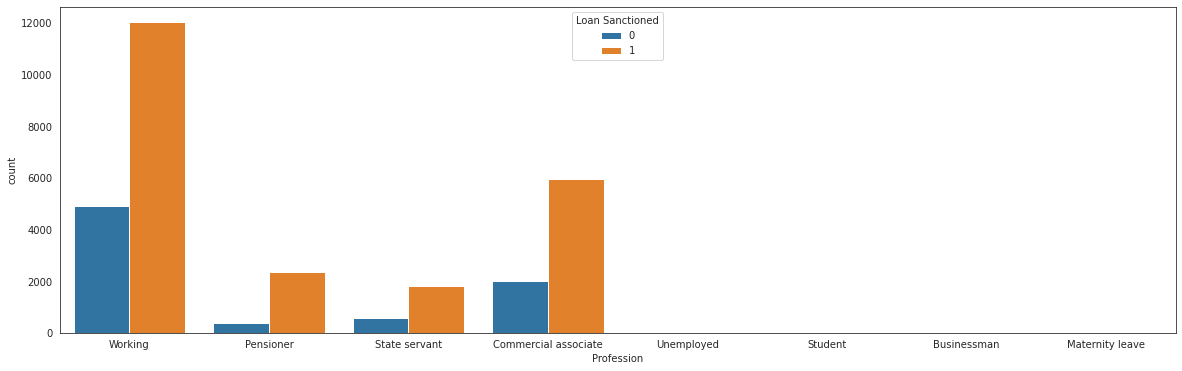

In [ ]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Profession', hue='Loan Sanctioned', data=dataset)

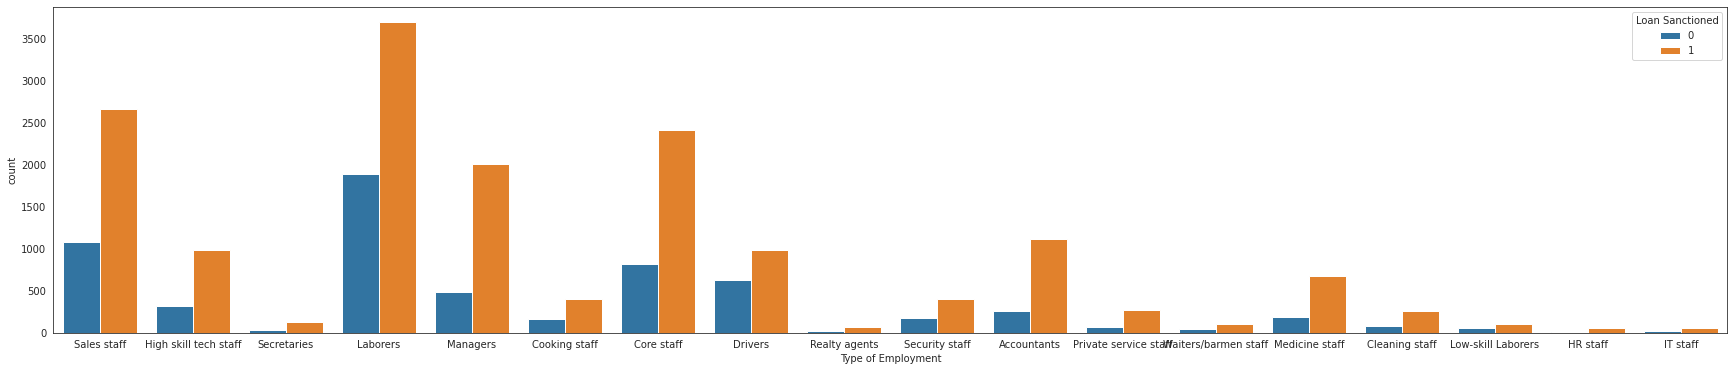

In [ ]:
fig_dims = (30, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Type of Employment', hue='Loan Sanctioned', data=dataset)

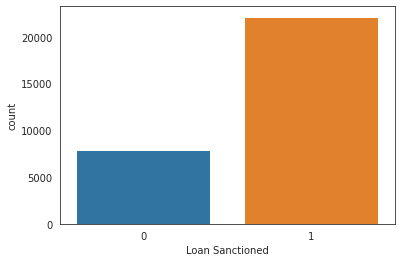

In [ ]:
sns.countplot(dataset['Loan Sanctioned'])

In [ ]:
data_classification

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability1,Loan Sanctioned
0,56,1933.050000,72809.58,241.08,3.0,809.440000,0,1,119933.46,54607.18,0,1
1,32,4952.910000,46837.47,495.81,1.0,780.400000,0,1,54791.00,37469.98,0,1
2,65,988.190000,45593.04,171.95,1.0,833.150000,0,0,72440.58,36474.43,1,1
3,65,2631.791559,80057.92,298.54,2.0,832.700000,1,1,121441.51,56040.54,1,1
4,31,2614.770000,113858.89,491.41,0.0,745.550000,1,1,208567.91,74008.28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28819,38,4969.410000,76657.90,722.34,2.0,869.610000,0,1,111096.56,68992.11,0,1
28820,20,1606.880000,66595.14,253.04,3.0,729.410000,0,1,73453.94,46616.60,0,1
28821,49,2631.791559,81410.08,583.11,0.0,740.050679,0,1,102108.02,61057.56,0,1
28822,38,2417.710000,142524.10,378.29,3.0,677.270000,1,1,168194.47,99766.87,0,1


In [ ]:
target

array([[ 54607.18],
       [ 37469.98],
       [ 36474.43],
       ...,
       [ 61057.56],
       [ 99766.87],
       [117217.9 ]])

In [ ]:
data_classification

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability1,Loan Sanctioned
0,56,1933.050000,72809.58,241.08,3.0,809.440000,0,1,119933.46,54607.18,0,1
1,32,4952.910000,46837.47,495.81,1.0,780.400000,0,1,54791.00,37469.98,0,1
2,65,988.190000,45593.04,171.95,1.0,833.150000,0,0,72440.58,36474.43,1,1
3,65,2631.791559,80057.92,298.54,2.0,832.700000,1,1,121441.51,56040.54,1,1
4,31,2614.770000,113858.89,491.41,0.0,745.550000,1,1,208567.91,74008.28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28819,38,4969.410000,76657.90,722.34,2.0,869.610000,0,1,111096.56,68992.11,0,1
28820,20,1606.880000,66595.14,253.04,3.0,729.410000,0,1,73453.94,46616.60,0,1
28821,49,2631.791559,81410.08,583.11,0.0,740.050679,0,1,102108.02,61057.56,0,1
28822,38,2417.710000,142524.10,378.29,3.0,677.270000,1,1,168194.47,99766.87,0,1


In [ ]:
target = data_classification.iloc[:, (data_classification.columns.get_loc('Loan Sanctioned'))].values
data_classification = data_classification.drop('Loan Sanctioned', axis = 1)

In [ ]:
data_classification=data_classification.drop('Loan Sanction Amount (USD)', axis=1)

In [ ]:
target = target.reshape(len(target),1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_classification, target, test_size = 0.20,random_state=21)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
Log_reg = LogisticRegression()

In [ ]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = Log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1score = f1_score(y_test, y_pred.round())
cm = confusion_matrix(y_test, y_pred)
score = cross_val_score(Log_reg, x_train, y_train, cv=5)
print("Cross validation for Logistic Regression : ",np.mean(score)*100)
print("Confusion Matrix for Logistic Regression : ", cm)
print("Accuracy for Logistic Regression: %.2f%%" % (accuracy * 100.0))
print("Precision for Logistic Regression: %.2f%%" % (precision * 100.0))
print("Recall for Logistic Regression: %.2f%%" % (recall * 100.0))
print("F1-score for Logistic Regression: %.2f" % (f1score))

Cross validation for Logistic Regression :  87.74012726082262
Confusion Matrix for Logistic Regression :  [[ 972  635]
 [  73 4085]]
Accuracy for Logistic Regression: 87.72%
Precision for Logistic Regression: 86.55%
Recall for Logistic Regression: 98.24%
F1-score for Logistic Regression: 0.92


In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression \n",classification_report(y_test, y_pred))

Logistic Regression 
               precision    recall  f1-score   support

           0       0.93      0.60      0.73      1607
           1       0.87      0.98      0.92      4158

    accuracy                           0.88      5765
   macro avg       0.90      0.79      0.83      5765
weighted avg       0.88      0.88      0.87      5765



Confusion Matrix for Logistic Regression


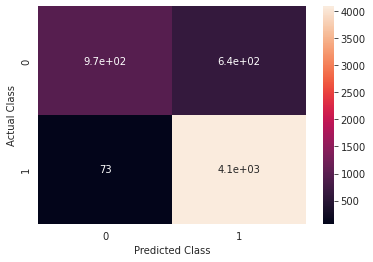

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(y_test, y_pred)
heat_map = sns.heatmap(cm_svc, annot=True)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
print("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
data_classification.columns[0]

'Age'

Text(0.5, 1.0, 'Logistic Regression Feature Importance')

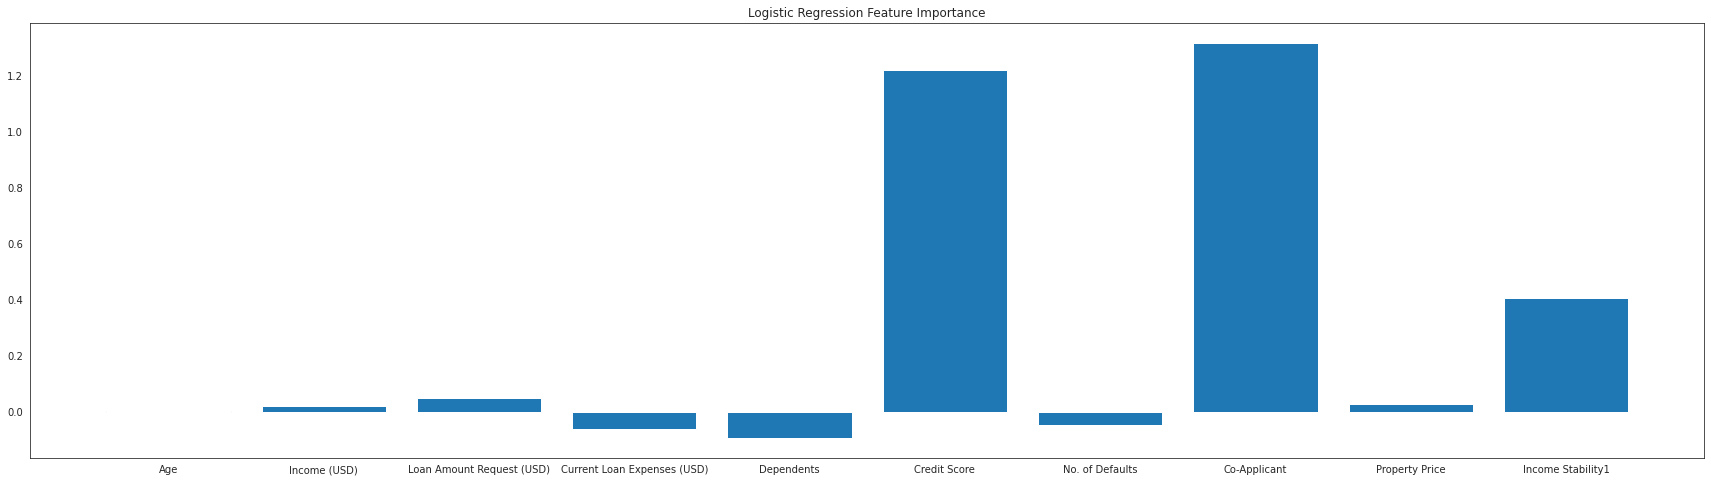

In [ ]:
from matplotlib import pyplot
col=[]
importance = Log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	  col.append(data_classification.columns[i])


plt.figure(figsize=(30,8))
plt.bar(col,importance)
plt.title('Logistic Regression Feature Importance')



In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Decision Tree Classifier Accuracy is", DT.score(x_test, y_test)*100)

Decision Tree Classifier Accuracy is 83.98959236773635


In [ ]:

score = cross_val_score(DT, x_train, y_train, cv=5)
print("Decision Tree Cross validation is",np.mean(score)*100)

Decision Tree Cross validation is 84.25774896675114


In [ ]:
y_pred = DT.predict(x_test)

accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1score = f1_score(y_test, y_pred.round())
cm = confusion_matrix(y_test, y_pred)
score = cross_val_score(DT, x_train, y_train, cv=5)
print("Cross validation for Decision Tree : ",np.mean(score)*100)
print("Confusion Matrix for Decision Tree : ", cm)
print("Accuracy for Decision Tree: %.2f%%" % (accuracy * 100.0))
print("Precision for Decision Tree: %.2f%%" % (precision * 100.0))
print("Recall for Decision Tree: %.2f%%" % (recall * 100.0))
print("F1-score for Decision Tree: %.2f" % (f1score))

Cross validation for Decision Tree :  84.32279478745632
Confusion Matrix for Decision Tree :  [[1184  423]
 [ 500 3658]]
Accuracy for Decision Tree: 83.99%
Precision for Decision Tree: 89.63%
Recall for Decision Tree: 87.97%
F1-score for Decision Tree: 0.89


In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree \n",classification_report(y_test, y_pred))

Decision Tree 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1607
           1       0.90      0.88      0.89      4158

    accuracy                           0.84      5765
   macro avg       0.80      0.81      0.80      5765
weighted avg       0.84      0.84      0.84      5765



Confusion Matrix for Decision Tree


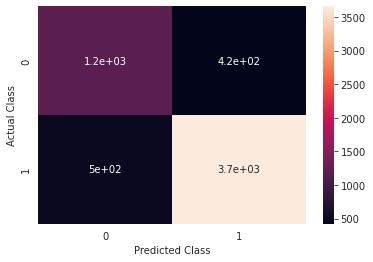

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(y_test, y_pred)
heat_map = sns.heatmap(cm_svc, annot=True)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
print("Confusion Matrix for Decision Tree")
plt.show()

In [ ]:
importances = pd.DataFrame({'Features':data_classification.columns,'Importance':np.round(DT.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit Score,0.448
Co-Applicant,0.150
Income (USD),0.081
Loan Amount Request (USD),0.066
Current Loan Expenses (USD),0.066
Income Stability1,0.064
Property Price,0.063
Age,0.039
Dependents,0.017


In [ ]:
importances

,Importance
Features,
Credit Score,0.448
Co-Applicant,0.150
Income (USD),0.081
Loan Amount Request (USD),0.066
Current Loan Expenses (USD),0.066
Income Stability1,0.064
Property Price,0.063
Age,0.039
Dependents,0.017


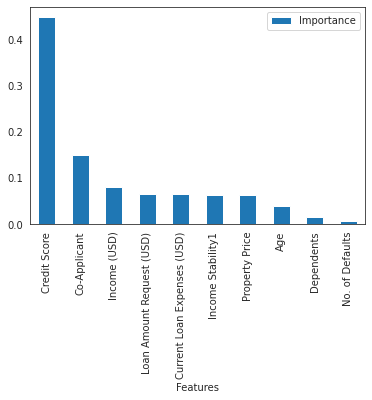

In [ ]:
importances.plot.bar()

In [ ]:

RF = RandomForestClassifier()

In [ ]:
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
score = cross_val_score(RF, x_train, y_train, cv=5)
print("Random Forest Cross validation is",np.mean(score)*100)

Random Forest Cross validation is 91.07072288202558


In [ ]:
y_pred = RF.predict(x_test)

accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1score = f1_score(y_test, y_pred.round())

score = cross_val_score(RF, x_train, y_train, cv=5)
print("Cross validation for Random Forest : ",np.mean(score)*100)
print("Accuracy for Random Forest: %.2f%%" % (accuracy * 100.0))
print("Precision for Random Forest: %.2f%%" % (precision * 100.0))
print("Recall for Random Forest: %.2f%%" % (recall * 100.0))
print("F1-score for Random Forest: %.2f" % (f1score))

Cross validation for Random Forest :  91.13576776225936
Accuracy for Random Forest: 91.14%
Precision for Random Forest: 89.58%
Recall for Random Forest: 99.25%
F1-score for Random Forest: 0.94


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random Forest  : ", cm)

Confusion Matrix for Random Forest  :  [[1127  480]
 [  32 4126]]


In [ ]:
from sklearn.metrics import classification_report

print("Random Forest \n",classification_report(y_test, y_pred))

Random Forest 
               precision    recall  f1-score   support

           0       0.97      0.70      0.82      1607
           1       0.90      0.99      0.94      4158

    accuracy                           0.91      5765
   macro avg       0.93      0.85      0.88      5765
weighted avg       0.92      0.91      0.91      5765



Confusion Matrix for Random Forest


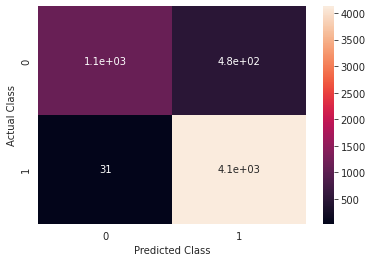

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(y_test, y_pred)
heat_map = sns.heatmap(cm_svc, annot=True)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
print("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
test_class_pred = RF.predict(test_data)

In [ ]:
Loan_Status = pd.DataFrame({'Customer ID' : CUST_ID,'Loan Amount Request (USD)' : REQ_AMT, 'Loan Sanctioned':test_class_pred})

In [ ]:
Loan_Status

,Customer ID,Loan Amount Request (USD),Loan Sanctioned
0,C-26247,137088.98,1
1,C-35067,104771.59,1
2,C-34590,176684.91,0
3,C-16668,97009.18,1
4,C-12196,109980.00,1
...,...,...,...
19995,C-9076,156766.97,1
19996,C-17587,47924.80,1
19997,C-46479,18629.88,0
19998,C-3099,95430.73,1


In [ ]:
importances = pd.DataFrame({'Features':data_classification.columns,'Importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit Score,0.416
Co-Applicant,0.183
Income (USD),0.081
Property Price,0.067
Loan Amount Request (USD),0.066
Current Loan Expenses (USD),0.066
Age,0.058
Income Stability1,0.031
Dependents,0.025


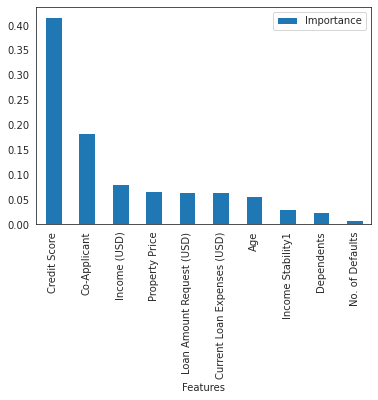

In [ ]:

importances.plot.bar()

In [ ]:
# model1=tf.keras.models.Sequential()

# model1.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=[x_train.shape[1]])),
# model1.add(tf.keras.layers.Dense(units=8, activation='relu'))
# model1.add(tf.keras.layers.Dense(units=2, activation='relu'))
# model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')

# opt = tf.keras.optimizers.Adagrad(learning_rate=0.01)
# model1.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae','mse'])





model2=tf.keras.models.Sequential()

model2.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=[x_train.shape[1]])),
model2.add(tf.keras.layers.Dense(units=8, activation='relu'))
model2.add(tf.keras.layers.Dense(units=4, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

opt = tf.keras.optimizers.Adagrad(learning_rate=0.01)



model2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 16)                176       
                                                                 
 dense_115 (Dense)           (None, 8)                 136       
                                                                 
 dense_116 (Dense)           (None, 4)                 36        
                                                                 
 dense_117 (Dense)           (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(x_train, y_train,validation_split=0.2, epochs=120, batch_size=100)

Epoch 1/120
185/185 [==============================] - 1s 3ms/step - loss: 0.5459 - accuracy: 0.7624 - val_loss: 0.4708 - val_accuracy: 0.8246
Epoch 2/120
185/185 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8457 - val_loss: 0.3861 - val_accuracy: 0.8643
Epoch 3/120
185/185 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8685 - val_loss: 0.3620 - val_accuracy: 0.8734
Epoch 4/120
185/185 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8755 - val_loss: 0.3521 - val_accuracy: 0.8825
Epoch 5/120
185/185 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8821 - val_loss: 0.3461 - val_accuracy: 0.8862
Epoch 6/120
185/185 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8855 - val_loss: 0.3417 - val_accuracy: 0.8870
Epoch 7/120
185/185 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8881 - val_loss: 0.3387 - val_accuracy: 0.8873

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


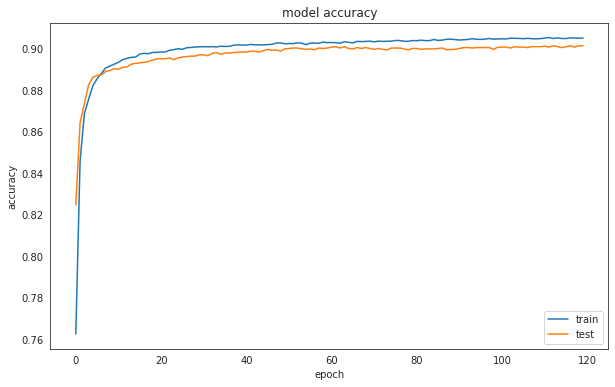

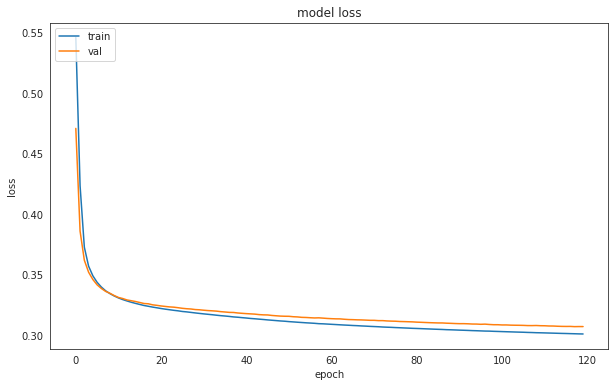

In [ ]:
# list all data in history
print(history.history.keys())
#summarize history for accuracy
fig = plt.figure(figsize = (10,6))
# plt.yticks(range(90,100))
# plt.ylim(0.25, 0.8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss

plt.figure(figsize = (10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model2.evaluate(x_test,y_test)

181/181 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.9018


[0.3067934811115265, 0.9018213152885437]

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
#Prediction

y_pred = (y_pred > 0.5)


[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
y_pred

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
y_pred

array([[0.89602125],
       [0.88584995],
       [0.02971429],
       ...,
       [0.9291756 ],
       [0.85107416],
       [0.91556364]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1127  480]
 [  31 4127]]


0.9113616652211621

In [ ]:
print("Neural Network Classification Report \n",classification_report(y_test, y_pred))

Neural Network Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.70      0.82      1607
           1       0.90      0.99      0.94      4158

    accuracy                           0.91      5765
   macro avg       0.93      0.85      0.88      5765
weighted avg       0.92      0.91      0.91      5765



Confusion Matrix for Neural Network


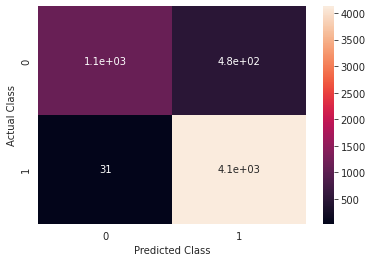

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred)
heat_map = sns.heatmap(cm_svc, annot=True)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
print("Confusion Matrix for Neural Network")
plt.show()

Classification END